### Connor Contursi - Task 1 [Own Data]

# Data Processing

In [3]:
# module imports
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

# Sklearn module imports
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

path = "C:/Users/indie/Assignment 5/Own"

# ----------------------------------------------------------------------------------

# Initializes individual data sets
class_wave = pd.DataFrame()
class_fistbump = pd.DataFrame()
wave_files = 0
fist_files = 0

# Strings used to open the correct files
wave_match = "wave"
fist_match = "fist"

# Counts all the files in a given directory.
initial_count = len(
    [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
)
dirre = os.listdir(path)
file_count = 2 * len(dirre)

# Iterates through the directory and compiles data for waves and fist bumps.
# Also displays a progress bar at the bottom which keeps track of work done.
with tqdm(total=file_count) as pbar:
    for subdir, dirs, files in os.walk(path):
        for file in files:
            os.chdir(subdir)

            # Checks for wave file and then pulls data
            if wave_match in file.lower():
                pbar.update(1)  # Increment the progress bar
                wave_array = np.genfromtxt(
                    file, delimiter=",", dtype=str, usecols=range(6), skip_header=1
                )
                wave_array = wave_array.reshape(50, 119 * 6)
                wave_data_array = pd.DataFrame(wave_array)
                class_wave = pd.concat([class_wave, wave_data_array])
                wave_files += 1

            # Checks for fist bump file and then pulls data
            if fist_match in file.lower():
                pbar.update(1)  # Increment the progress bar
                fist_array = np.genfromtxt(
                    file, delimiter=",", dtype=str, usecols=range(6), skip_header=1
                )
                fist_array = fist_array.reshape(50, 119 * 6)
                fist_data_array = pd.DataFrame(fist_array)
                class_fistbump = pd.concat([class_fistbump, fist_data_array])
                fist_files += 1

pbar.close()

# ----------------------------------------------------------------------------------

# Combines all of class data for wave and fistbumps into single set
class_data = pd.concat([class_wave, class_fistbump])
x, unused_y = class_data.shape

# Creates y labels
y = np.zeros(x)

for position in range(int(0.50 * x), x, 1):
    y[position] = 1

y = y.astype(np.int16)

100%|██████████| 2/2 [00:00<00:00, 24.16it/s]


## Random Forests Model & Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



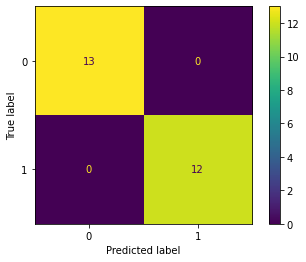

In [4]:
# ----------------------------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(class_data, y, random_state=0)

# creates logistic regression classifier; fits data with trained sets; generates predictions from test split
model = RandomForestClassifier(max_depth=3)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)

# generates confusion matrix and plots data
matrix = confusion_matrix(y_test, y_prediction)
plot_confusion_matrix(model, x_test, y_test)

# prints precision, recall, and f1 score
print(metrics.classification_report(y_test, y_prediction))
plt.show()
# ----------------------------------------------------------------------------------

### Deployment

In [5]:
# ----------------------------------------------------------------------------------
from micromlgen import port

# File path + name
path = "C:/Users/indie/Assignment 5/model"
file = "Classifier"

# Checks if the path already exists and if it doesn't, it's created
if not os.path.exists(path):
    os.makedirs(path)

# Removes Classifier.h if it was already created so new one can be made
if os.path.exists("C:/Users/indie/Assignment 5/model/Classifier.h"):
    os.remove("C:/Users/indie/Assignment 5/model/Classifier.h")

# Creates file
filename = file + ".h"
with open("C:/Users/indie/Assignment 5/model/Classifier.h", "w") as file:
    file.write(port(model, classname="Classifier"))

# Checks file size, converts it to kb, and prints output
file_size = os.path.getsize("C:/Users/indie/Assignment 5/model/Classifier.h")
kb = round(file_size / 1024, 1)
print("File size:", kb, "kb")
# ----------------------------------------------------------------------------------

File size: 28.4 kb
